# D208 Task 2 Performance Assessment

## Logistic Regression Modeling

### WGU

### Ryan Russon

### Student ID: 010337779

### 01/16/2024


## Part 1: Research Question

### A1: Research Question

- What factors most significantly predict the readmission of a patient?

### A2: Objectives and Goals of Analysis

- This analysis aims to provide insights into how different variables contribute to a patient's readmission. By understanding these relationships, healthcare providers can improve patient care, manage resources more efficiently, and improve patient outcomes.

## Part 2: Method Justification

### B1: Assumptions

- Multicollinearity: The relationship each independent variable has with the other independent variables is not highly correlated.

- Independence: Observations are independent of each other and random.

### B2: Programming Language and Benefits

- Python is an excellent choice for data cleaning and analysis due to its simplicity and the powerful data manipulation capabilities offered by libraries like Pandas and NumPy.

    - Simplicity: 
        - Python's basic syntax naturally makes it highly readable and understandable. Developers can write and maintain code efficiently with Python.
    - Supportive Libraries:
        - Pandas is ideal for data manipulation and cleaning. It allows easy handling of missing data, data filtering, and aggregation, which is essential for preparing your dataset for regression analysis.
        - NumPy: Useful for numerical computations, which can be important when transforming data for regression analysis.
        - Statsmodels/Scikit-learn: These libraries provide extensive functionalities for implementing regression models, testing assumptions, and evaluating model performance.

### B3: Justification for Regression

#### Logistic Regression

- It allows for examining how multiple independent variables simultaneously affect the categorical dependent variable (ReAdmis).

- Logistic regression is an appropriate strategy for predictive analysis of a categorical variable,

- It helps make predictions. Once the model is fitted, it can predict patient readmission based on their specific blend of independent variables.

## Part 3: Data Preparation and Manipulation (Cleaning/Exploration/Wrangling)

### C1: Data Cleaning

- Goals and Steps:

    - Remove Duplicate Data: No duplicate data was found in the dataset, avoiding redundancy.
    
    - Handle Missing Values: No missing values were found in the dataset, ensuring completeness of data.
    
    - Identify and Treat Outliers: For example, in the 'TotalCharge' column, we identified outliers using the Interquartile Range (IQR) method. No action was taken on these outliers in this step, as further analysis is needed to determine if they are genuine extremes or errors.
    
    - Ensure Correct Data Types: Each column's data type was verified. In later steps, adjustments to data types will be based on the specific analysis requirements. Numerical non-categorical columns and all categorical columns were identified.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('C:/Users/Ryan/OneDrive/Desktop/WGU_Study/D208/Data Sets and Dictionaries/medical_clean.csv')
df.info()
df.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

False

In [118]:
all_cols = df.columns
print(all_cols)

num_cols = df.select_dtypes(include=['number']).columns
bad_cols = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
num_cols = num_cols.difference(bad_cols)
print(num_cols)

cat_cols = all_cols.difference(num_cols)
bad_cols_2 = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Job', 'CaseOrder', 'Lat', 'Lng', 'Zip']
cat_cols = cat_cols.difference(bad_cols_2)
print(cat_cols)


Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')
Index(['Additional_charges', 'Age', 'Children', 'Doc_visits',
       'Full_meals_eaten', 'Income', 'Initial_days', 'Population',
       'TotalCharge', 'VitD_levels', 'vitD_supp'],
      dtype='object')
Index(['Allergic_rhinitis', 'Anxiety', 'Area', 'Arthritis', 'Asthma',
       'BackPain', 'Complica

### C2: Data Exploration (EDA)

In [119]:
df[num_cols].describe()

,Additional_charges,Age,Children,Doc_visits,Full_meals_eaten,Income,Initial_days,Population,TotalCharge,VitD_levels,vitD_supp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12934.528587,53.511700,2.097200,5.012200,1.001400,40490.495160,34.455299,9965.253800,5312.172769,17.964262,0.398900
std,6542.601544,20.638538,2.163659,1.045734,1.008117,28521.153293,26.309341,14824.758614,2180.393838,2.017231,0.628505
min,3125.703000,18.000000,0.000000,1.000000,0.000000,154.080000,1.001981,0.000000,1938.312067,9.806483,0.000000
25%,7986.487755,36.000000,0.000000,4.000000,0.000000,19598.775000,7.896215,694.750000,3179.374015,16.626439,0.000000
50%,11573.977735,53.000000,1.000000,5.000000,1.000000,33768.420000,35.836244,2769.000000,5213.952000,17.951122,0.000000
75%,15626.490000,71.000000,3.000000,6.000000,2.000000,54296.402500,61.161020,13945.000000,7459.699750,19.347963,1.000000
max,30566.070000,89.000000,10.000000,9.000000,7.000000,207249.100000,71.981490,122814.000000,9180.728000,26.394449,5.000000


- Discussion of Summary Statistics

    - count: The number of non-null entries.
    - mean: The average value.
    - std (standard deviation): Measures the data's variation or dispersion.
    - min: The minimum value.
    - 25% (1st quartile): The median of the first half of the data.
    - 50% (median): The middle value when the data is sorted.
    - 75% (3rd quartile): The median of the second half of the data.
    - max: The maximum value.
    
- The above summary statistics were only performed on numerical and non-categorical columns. Only those columns were included in these summary statistics.

- Below are the summary statistics for non-numeric columns:

In [120]:
for column in cat_cols:
    print(df[column].value_counts())

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64
No     6785
Yes    3215
Name: Anxiety, dtype: int64
Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64
No     6426
Yes    3574
Name: Arthritis, dtype: int64
No     7107
Yes    2893
Name: Asthma, dtype: int64
No     5886
Yes    4114
Name: BackPain, dtype: int64
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64
No     7262
Yes    2738
Name: Diabetes, dtype: int64
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64
No     5910
Yes    4090
Name: HighBlood, dtype: int64
No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: Item1, dtype: int64
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Item2, dtype: in

### C3: Visualizations

#### Univariate

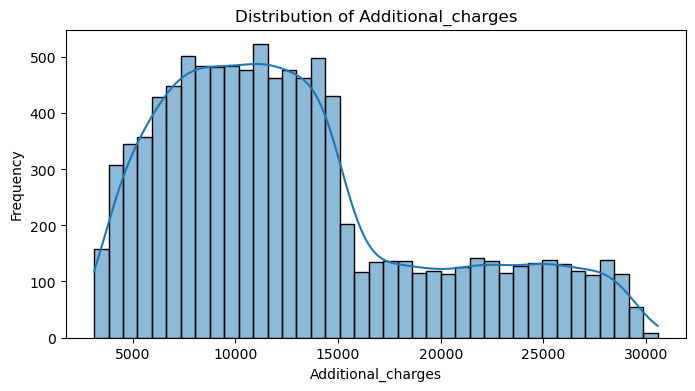

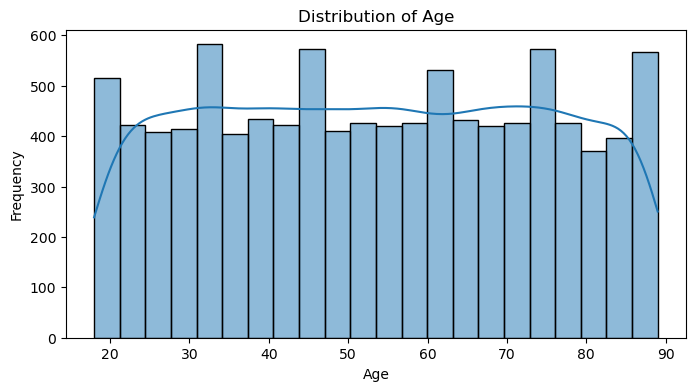

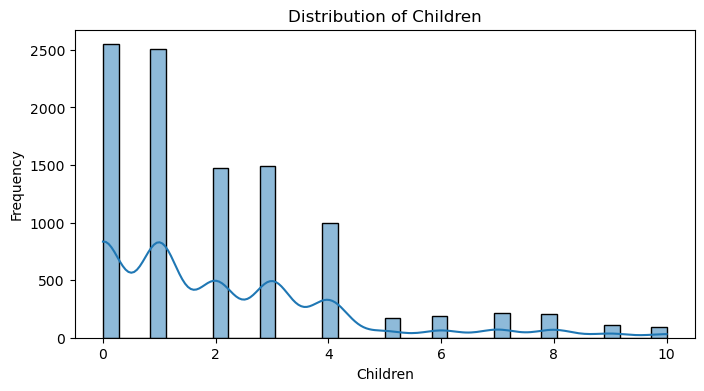

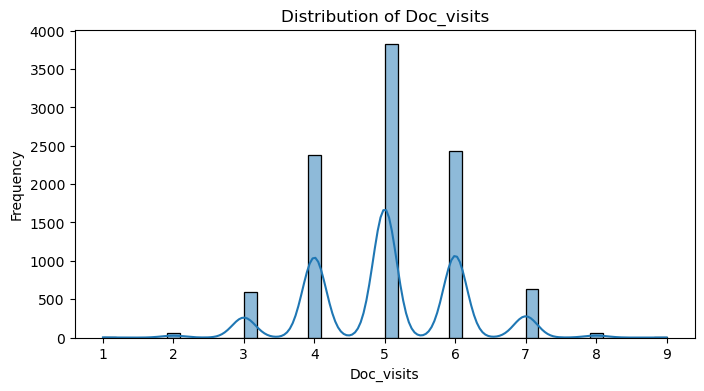

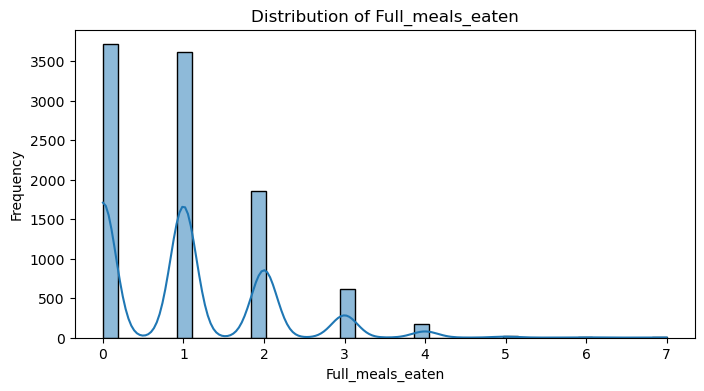

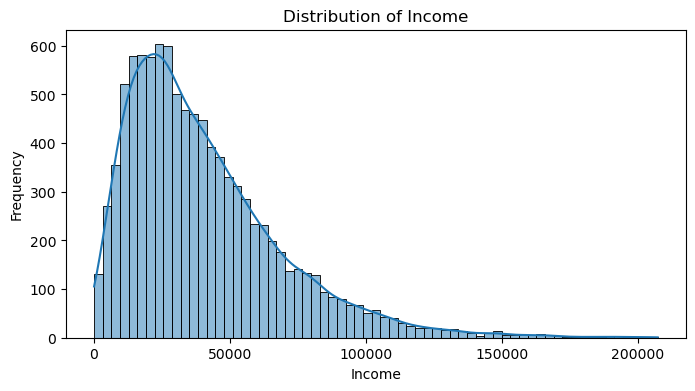

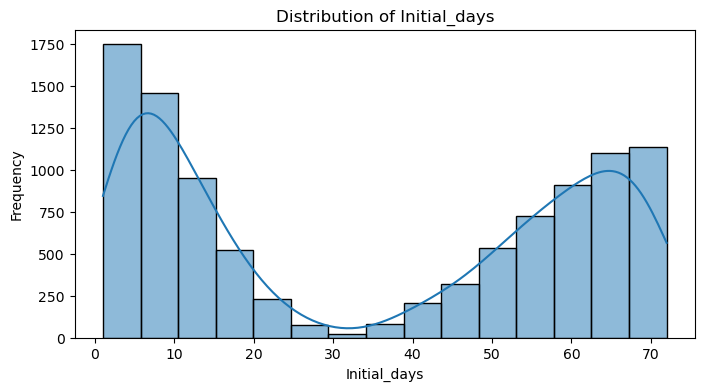

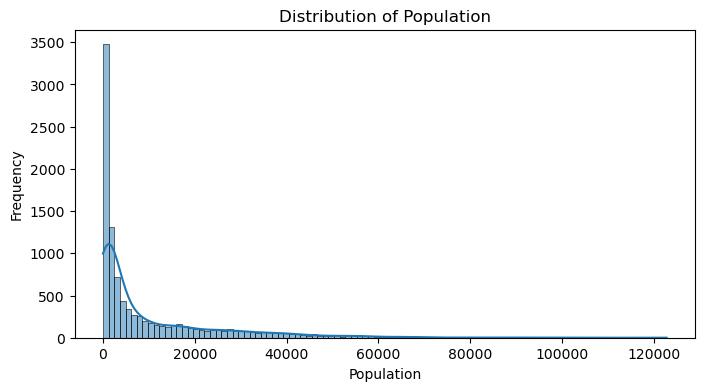

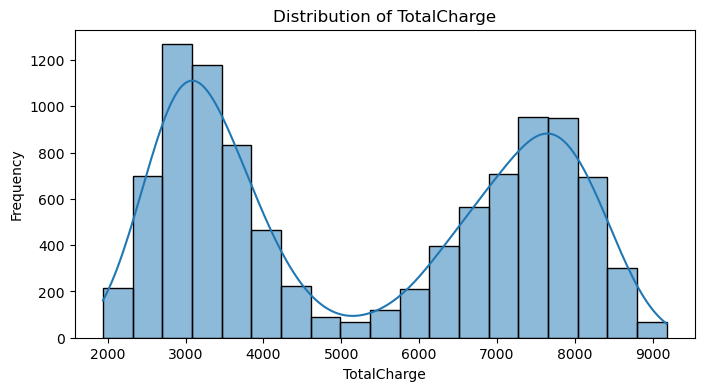

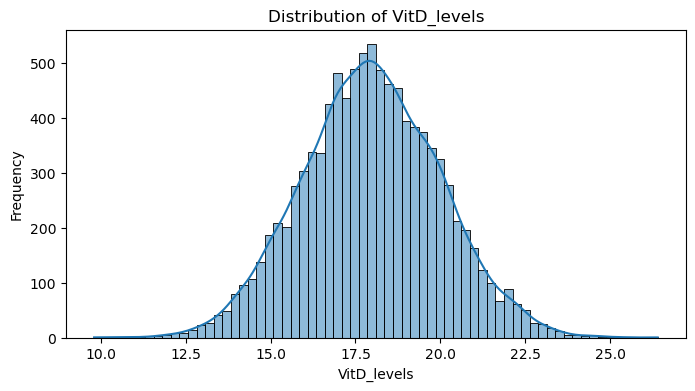

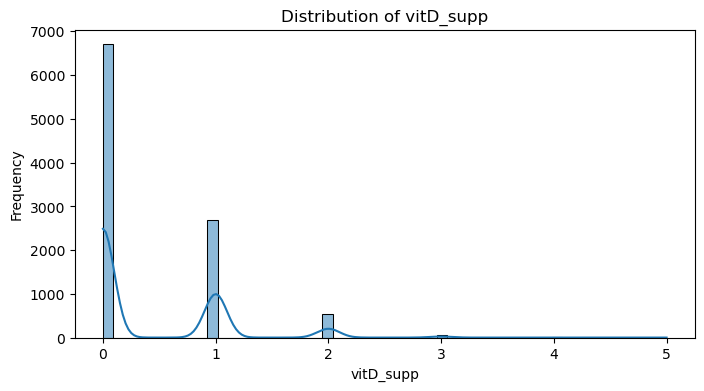

In [121]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Bivariate

##### Continuous to Categorical Pairs

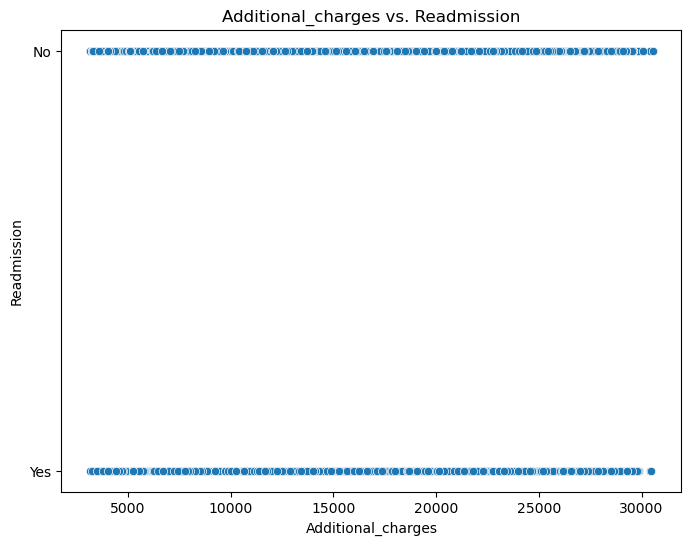

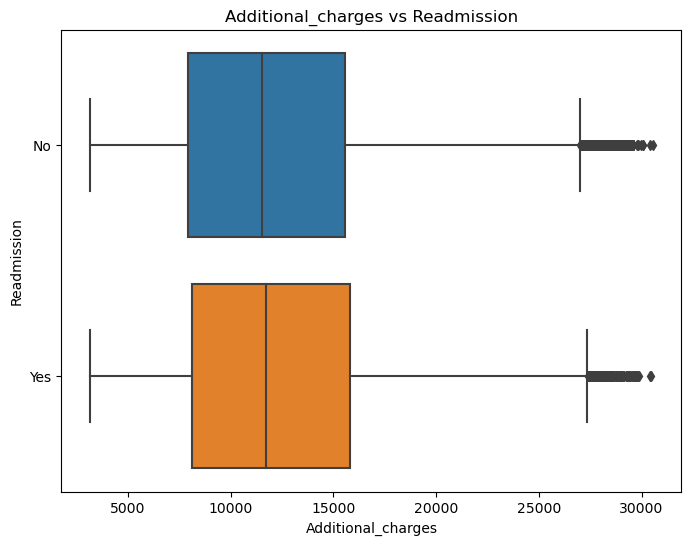

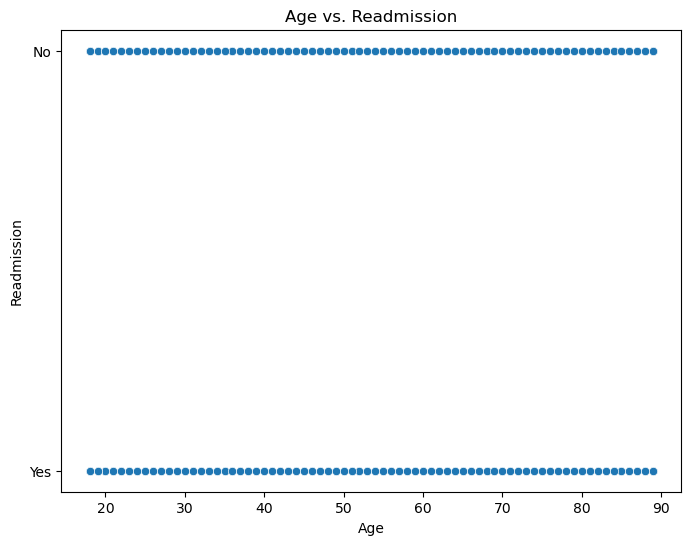

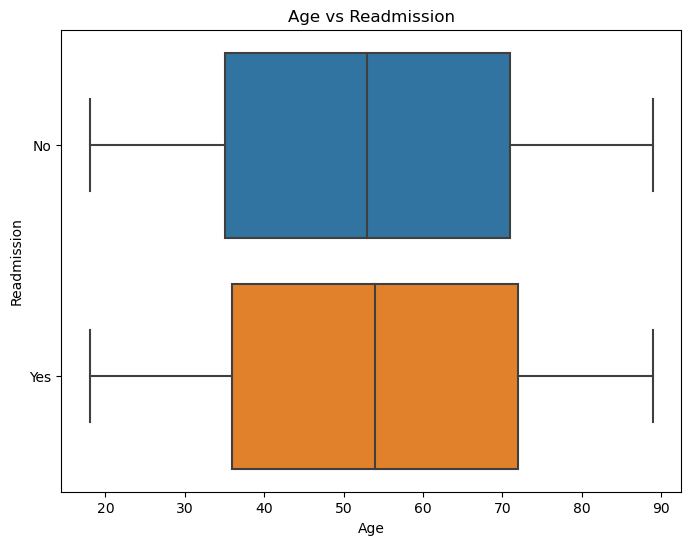

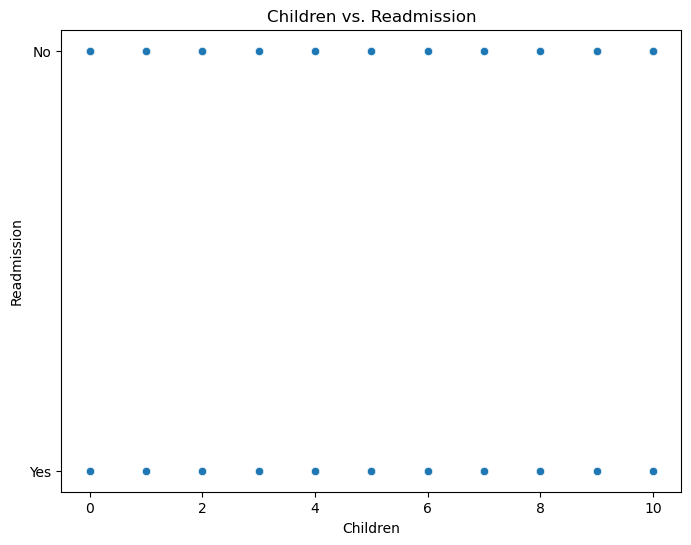

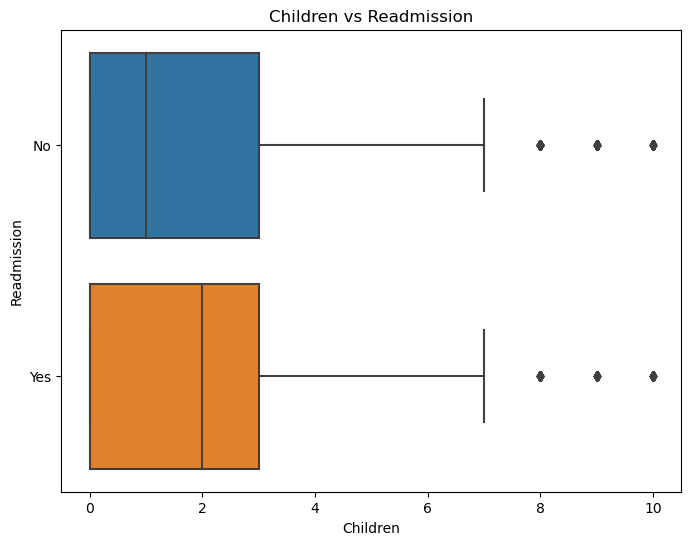

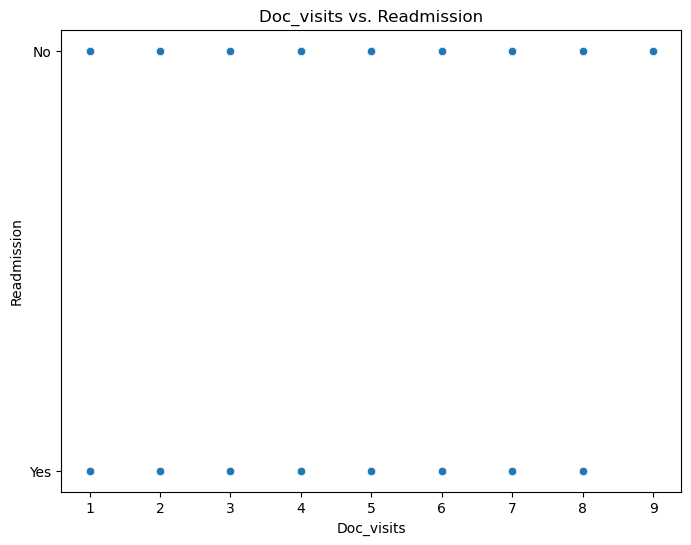

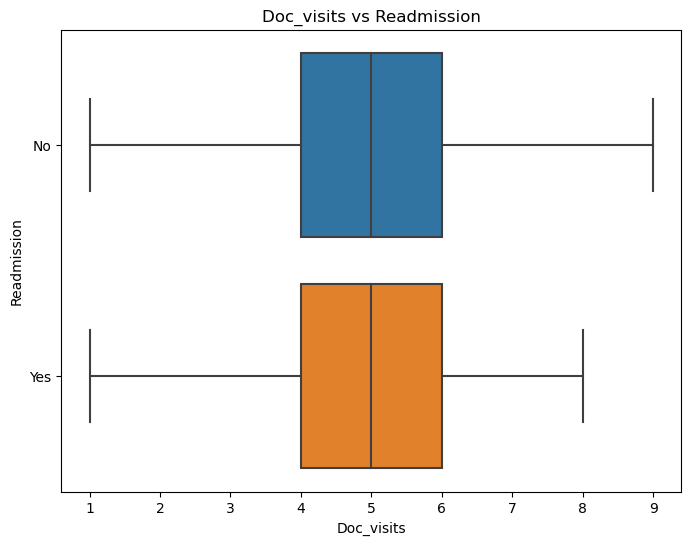

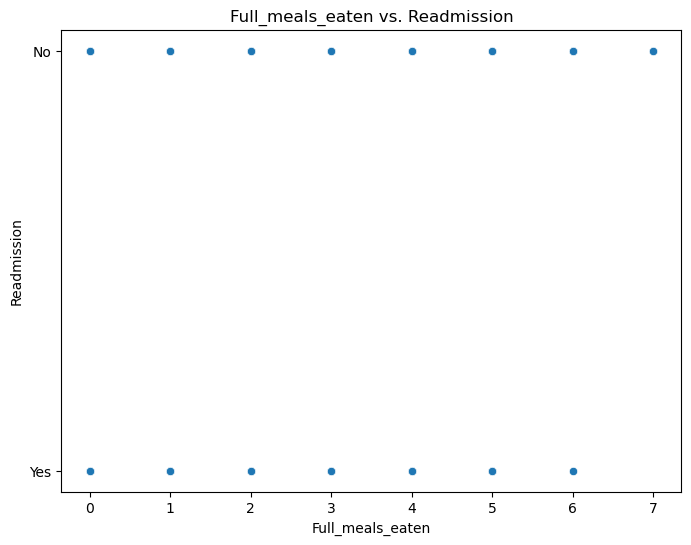

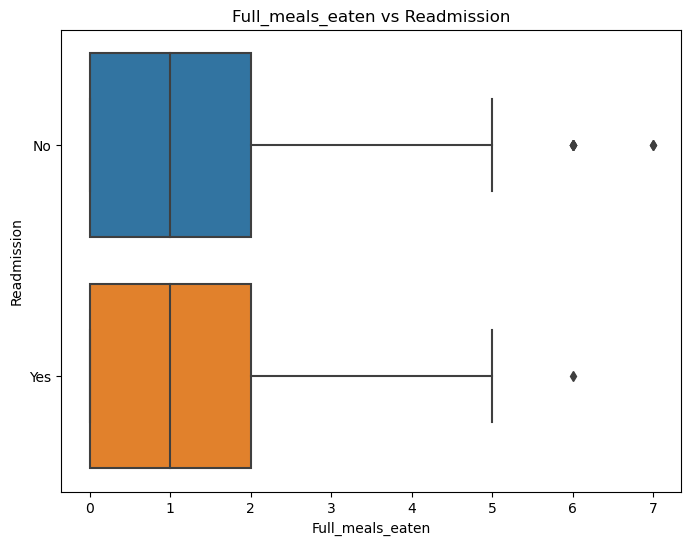

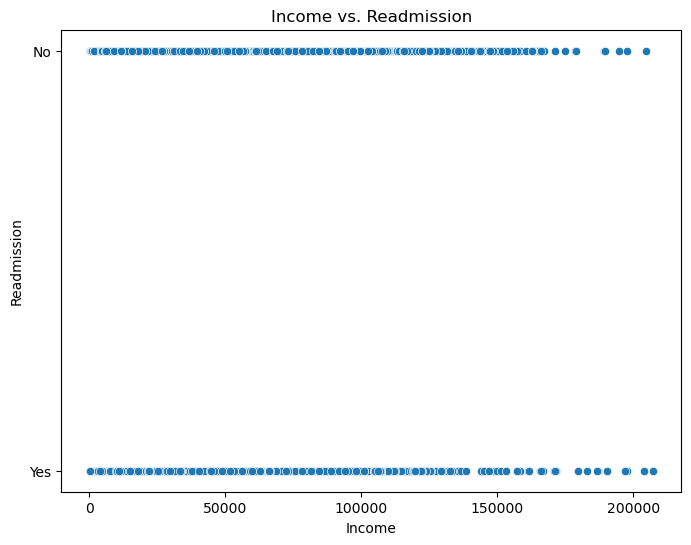

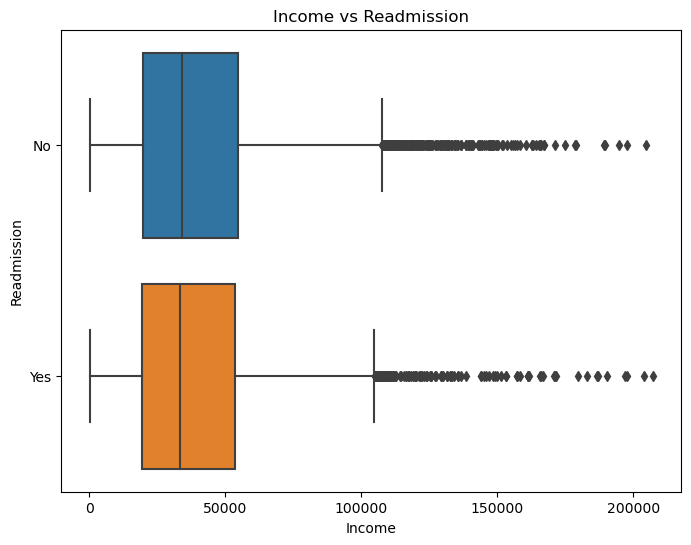

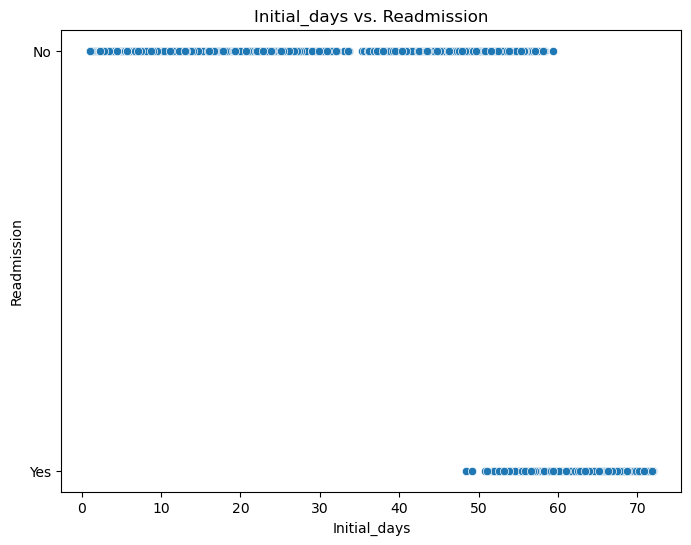

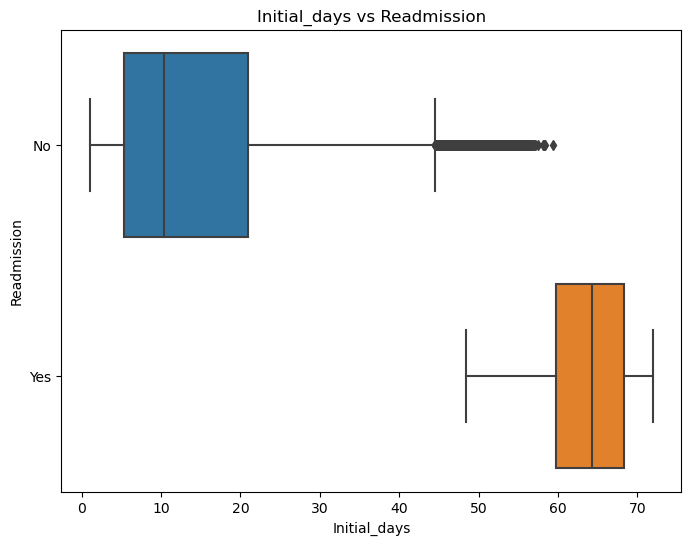

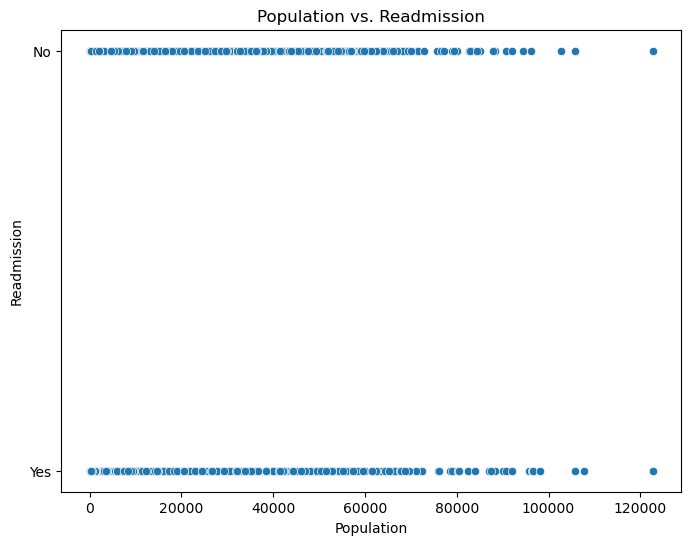

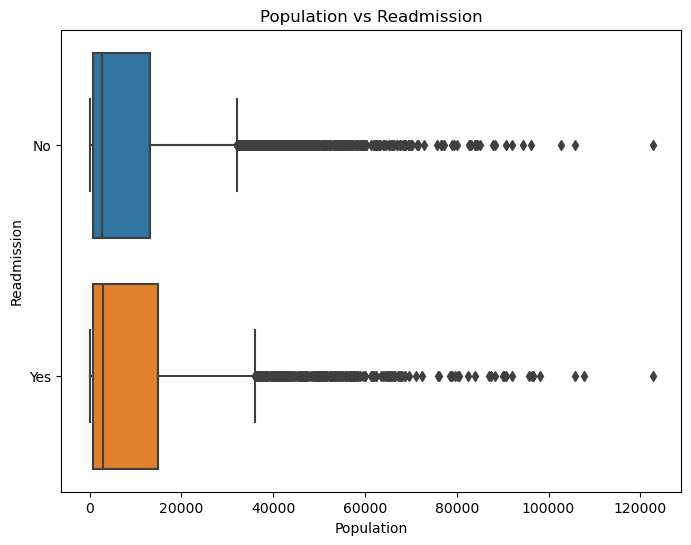

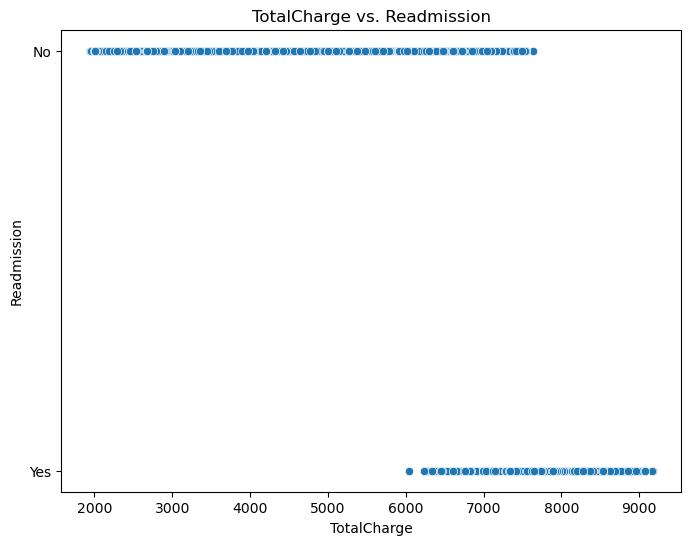

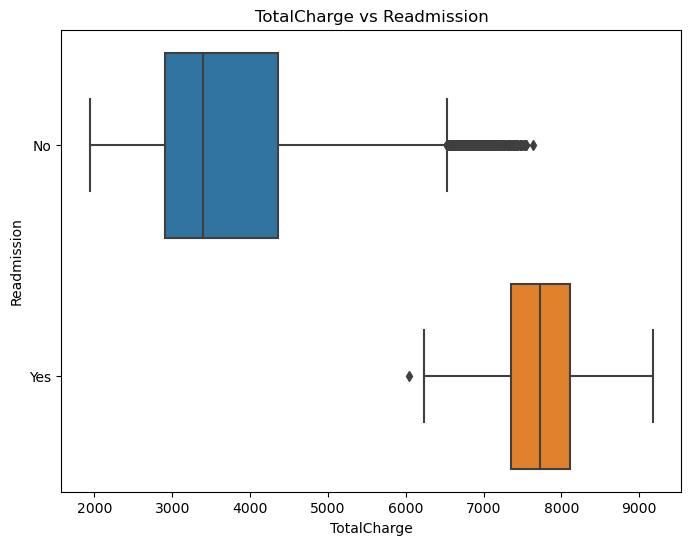

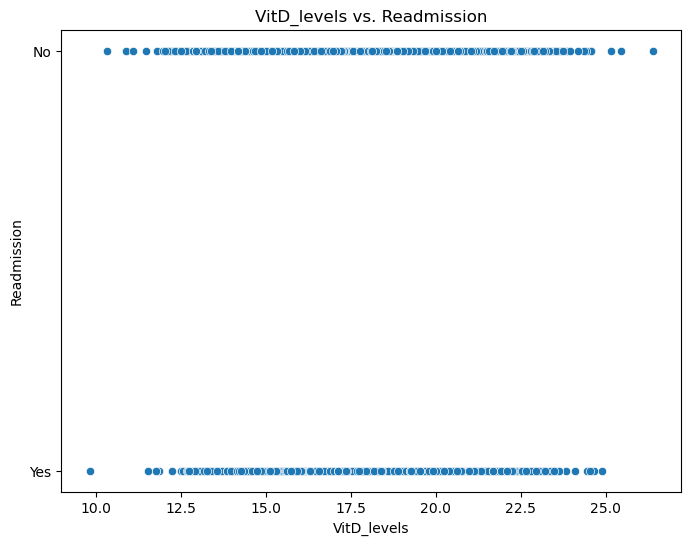

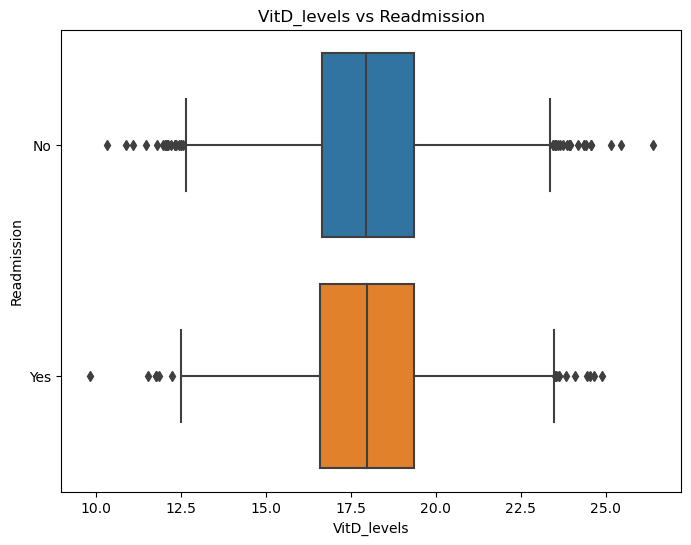

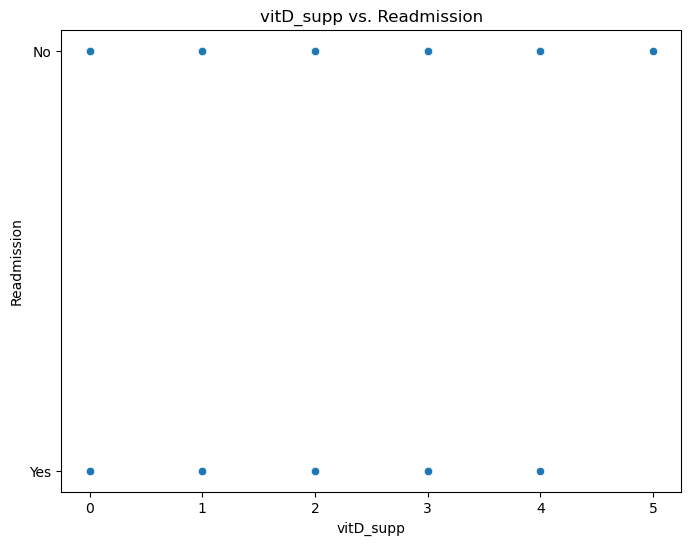

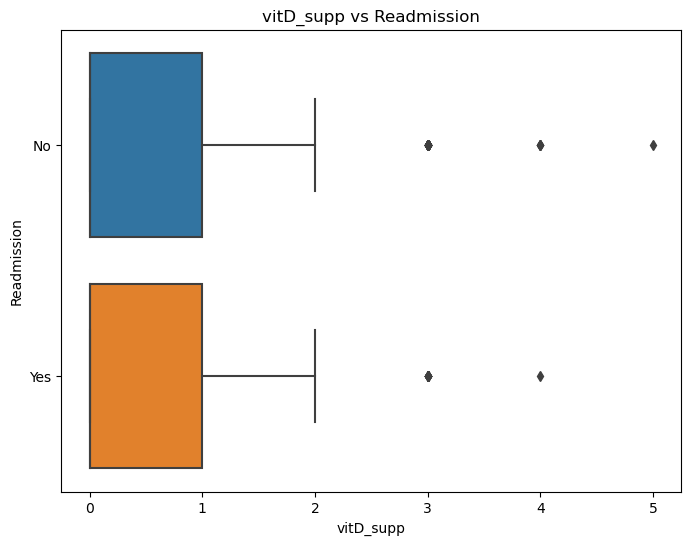

                        T-stat   P-value
Additional_charges    1.361973  0.173237
Age                   1.581082  0.113891
Children              2.353569  0.018613
Doc_visits            0.024566  0.980401
Full_meals_eaten     -1.217155  0.223574
Income               -1.150346  0.250029
Initial_days        161.932411  0.000000
Population            2.004176  0.045078
TotalCharge         157.168754  0.000000
VitD_levels           0.408221  0.683120
vitD_supp             1.103822  0.269697


In [122]:
ttest_results = {}

for col in num_cols:
    if col == 'ReAdmis':
        continue;
    
    group1 = df[df['ReAdmis'] == 'Yes'][col]
    group2 = df[df['ReAdmis'] == 'No'][col]
    
    t_stat, p_value = ttest_ind(group1, group2)
    
    ttest_results[col] = {'T-stat': t_stat, 'P-value': p_value}
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['ReAdmis'])
    plt.title(f'{col} vs. Readmission')
    plt.xlabel(col)
    plt.ylabel('Readmission')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], y=df['ReAdmis'])
    plt.title(f'{col} vs Readmission')
    plt.xlabel(col)
    plt.ylabel('Readmission')
    plt.show()
    
ttest_df = pd.DataFrame(ttest_results).T

print(ttest_df)

##### Categorical to Categorical Pairs

In [123]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p

chi_results = {}

for col in cat_cols:
    if col == 'ReAdmis':
        continue
    chi2, p = chi_square_test(df, col, 'ReAdmis')
    chi_results[col] = {'Chi2': chi2, 'p-value': p}
    
chi_df = pd.DataFrame(chi_results).T

print(chi_df)

                         Chi2   p-value
Allergic_rhinitis    0.196991  0.657161
Anxiety              0.047705  0.827107
Area                 0.713313  0.700013
Arthritis            0.554512  0.456480
Asthma               2.857452  0.090951
BackPain             1.716615  0.190129
Complication_risk    0.159022  0.923568
Diabetes             0.079833  0.777524
Gender               1.585771  0.452537
HighBlood            0.042397  0.836866
Hyperlipidemia       0.167074  0.682726
Initial_admin        3.889968  0.142990
Item1                6.826957  0.447117
Item2                9.129144  0.166444
Item3                9.876953  0.195654
Item4                5.007596  0.542839
Item5                1.615424  0.951462
Item6                6.090464  0.413133
Item7                6.289736  0.391528
Item8                7.680676  0.262444
Marital              5.085194  0.278667
Overweight           0.698480  0.403295
Reflux_esophagitis   0.271563  0.602285
Services             8.892645  0.030753


In [124]:
print(df['Services'].unique())

['Blood Work' 'Intravenous' 'CT Scan' 'MRI']


In [125]:
df['Services_iv'] = df['Services']
df['Services_ct'] = df['Services']
df['Services_mri'] = df['Services']

### C4: Data Wrangling

- The predictive variables (independent variables) chosen after exploring the data are as follows:
    - Continuous
        - Children
        - Initial_days
        - TotalCharge
    - Categorical
        - Services
        
- Decision to include certain continuous variables:
    - The chosen continuous varaibles all had a strong difference in the medians, and low p-value for the respective categories within that variable. This lead me to believe that they can be possible strong predictors of our dependent variable.
    
- Decision to include certain categorical variables:
    - The chosen categorical variable was the only categorical variable that had a p-value below the 0.05 threshold, which leads me to believe that it can possibly be a strong predictor of our dependent variable.
    
- The above categorical variable will need to be re-expressed for further analysis. Many predictive models require numerical input, and due to this our categorical variables need to be transformed into numerical variables for accurate analysis. I will re-express this with one-hot encoding. The k-1 strategy will be used to avoid multicollinearity here. The re-expressed column will be as follows:
    - Services_iv
    - Services_ct
    - Services_mri

In [126]:
transform_dict = {'Services_iv': {'Blood Work': 0, 'Intravenous': 1, 'CT Scan': 0, 'MRI': 0},
                 'Services_ct': {'Blood Work': 0, 'Intravenous': 0, 'CT Scan': 1, 'MRI': 0},
                 'Services_mri': {'Blood Work': 0, 'Intravenous': 0, 'CT Scan': 0, 'MRI': 1},
                 'ReAdmis': {'No': 0, 'Yes': 1}}

df.replace(transform_dict, inplace=True)

print(df['Services_iv'].value_counts())
print(df['Services_ct'].value_counts())
print(df['Services_mri'].value_counts())
print(df['ReAdmis'].value_counts())

0    6870
1    3130
Name: Services_iv, dtype: int64
0    8775
1    1225
Name: Services_ct, dtype: int64
0    9620
1     380
Name: Services_mri, dtype: int64
0    6331
1    3669
Name: ReAdmis, dtype: int64


### C5: Prepared Dataset

df[['Children', 'Initial_days', 'Services_iv', 'Services_ct', 'Services_mri', 'TotalCharge']].to_csv(r'C:\Users\Ryan\OneDrive\Desktop\WGU_Study\D208\Part2Final.csv')

## Part 4: Model Comparison and Analysis

### D1: Initial Model

In [127]:
X = df[['Children', 'Initial_days', 'Services_iv', 'Services_ct', 'Services_mri', 'TotalCharge']]
y = df['ReAdmis']

X = sm.add_constant(X)

log_model = sm.Logit(y, X).fit()

print(log_model.summary())
print('\n')
print(f'Initial Model AIC: {log_model.aic}')
print(f'Initial Model BIC: {log_model.bic}')

Optimization terminated successfully.
         Current function value: 0.043375
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.9340
Time:                        13:14:36   Log-Likelihood:                -433.75
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6717      3.215    -20.429      0.000     -71.972     -59.371
Children         0.065

### D2: Model Reduction Method and Justification

- The Wrapper Method with Backwards Stepwise Elimination is the strategy that I will use.
    
    - In this method, you complete your summary of your model and then find which variables have p-values within the threshold of 0.05.
    
    - This summary shows that the p-value of Services_iv and Children are outside our desired threshold. We will remove both columns as independent variables used to predict in this model. 
    
- Why:

    This method works well with our research question, which seeks to identify the most impactful predictors of 'ReAdmis'. By starting with a set of variables and removing the least significant ones, we ensure that our final model includes only those that contribute meaningfully to the prediction.
    
### D3: Reduced Method



In [128]:
reduced_X = df[['Children', 'Initial_days', 'Services_ct', 'Services_mri', 'TotalCharge']]
reduced_y = df['ReAdmis']

reduced_X = sm.add_constant(reduced_X)

reduced_log_model = sm.Logit(reduced_y, reduced_X).fit()

print(reduced_log_model.summary())
print('\n')
print(f'Reduced Model AIC: {reduced_log_model.aic}')
print(f'Reduced Model BIC: {reduced_log_model.bic}')

Optimization terminated successfully.
         Current function value: 0.043378
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.9340
Time:                        13:14:36   Log-Likelihood:                -433.78
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6871      3.214    -20.438      0.000     -71.986     -59.388
Children         0.064

In [129]:
reduced_X = df[['Initial_days', 'Services_ct', 'Services_mri', 'TotalCharge']]
reduced_y = df['ReAdmis']

reduced_X = sm.add_constant(reduced_X)

reduced_log_model = sm.Logit(reduced_y, reduced_X).fit()

print(reduced_log_model.summary())
print('\n')
print(f'Reduced Model AIC: {reduced_log_model.aic}')
print(f'Reduced Model BIC: {reduced_log_model.bic}')

Optimization terminated successfully.
         Current function value: 0.043514
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.9338
Time:                        13:14:36   Log-Likelihood:                -435.14
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.4493      3.202    -20.439      0.000     -71.726     -59.173
Initial_days     0.922

### E1: Model Comparison

#### Log-Likelihood:

    - Initial Model: -433.75
    - Reduced Model: -435.14
    
    - Comparison: This measurement is used to evaluate the goodness of fit for a model. A higher log-likelihood indicates a better fit for a model on a dataset. The initial model has a higher measurement here and indicates a slightly better goodness of fit to the dataset.

#### Pseudo R-squared:

    - Initial Model: 0.9340
    - Reduced Model: 0.9338
    
    - Comparison: This measurement evaluates a better fit for a model. A higher pseudo R-squared indicates a better fit for a model on a dataset. The initial model has a higher measurement here, indicating a slightly better fit to the dataset.
    
#### LLR-p-value:

    - Initial Model: 0.000
    - Reduced Model: 0.000
    
    - Comparison: This measurement is used to evaluate the usefulness of a model. An LLR-p-value below 0.05 indicates usefulness for a model on a dataset. The initial and reduced models have a low measurement here, indicating that they are useful for this dataset.
    
#### AIC:

    - Initial Model: 881.4997408539699
    - Reduced Model: 880.2893859445522
    
    - Comparison: This measurement evaluates the balance of complexity and fit. A lower AIC indicates a better balance of complexity and fit. The reduced model has a slightly lower AIC, indicating a better balance of complexity and fit.
    
#### BIC:

    - Initial Model: 931.9721234578031
    - Reduced Model: 916.3410878044332
    
    - Comparison: This measurement is used to evaluate the goodness of fit. A lower BIC indicates a better goodness of fit. The reduced model has a slightly lower BIC, indicating that it has a better goodness of fit.
    
    
### E2: Verify Assumptions: Confusion Matrix/Accuracy Calculation and Variance Inflation Factor



In [130]:
predicted_classes = reduced_log_model.predict(reduced_X) >= 0.5

conf_matrix = confusion_matrix(reduced_y, predicted_classes)

accuracy = accuracy_score(reduced_y, predicted_classes)

print('Confusion Matrix: \n', conf_matrix)
print('\n')
print('Accuracy: ', accuracy)

Confusion Matrix: 
 [[6235   96]
 [  86 3583]]


Accuracy:  0.9818


In [131]:
vif_data = pd.DataFrame()
vif_data['feature'] = reduced_X.columns
vif_data['VIF'] = [variance_inflation_factor(reduced_X.values, i) for i in range(len(reduced_X.columns))]

print(vif_data)

        feature        VIF
0         const  55.991518
1  Initial_days  40.717191
2   Services_ct   1.005951
3  Services_mri   1.005614
4   TotalCharge  40.719167


- A VIF of 10 or greater indicates multicollinearity, which is shown here between the independent variables Initial_days and TotalCharge.


### E3: Code

- See all above


## Part 5: Data Summary and Implications

### F1: Regression Equation, Coefficients, etc.

#### A: Regression Equation

- The equation for logistic regression is as follows:

    - ln(p^/(1-p^)) = b0 + b1X1 + b2X2 + ... + app
    
- The specific equation for our reduced model is as follows:

    - ln(p^/(1-p^)) = -65.4493 + 0.9224(Initial_days) + 1.2112(Services_ct) + 1.9908(Services_mri) + 0.0022(TotalCharge)
    
#### B: Interpretation

- Initial_days:
    
    For every unit increase of Initial_days, the logistical odds of ReAdmis increase by 0.9224 units.
    
- Services_ct:

    - For every unit increase of Services_ct, there is a 1.2112 unit increase in the logistical odds of ReAdmis.
    
- Services_mri:

    - For every unit increase of Services_mri, there is a 1.9908 unit increase in the logistical odds of ReAdmis.
    
- TotalCharge:

    - For every unit increase of TotalCharge, there is a 0.0022 unit increase in the logistical odds of ReAdmis.
    
#### C: Statistical and Practical Significance

- Statistical Significance:
    
    The reduced model is statistically significant. With a pseudo R-squared value of 0.9338, it suggests that the model explains a significant portion of the variance in the dependent variable.
    
    The LLR p-value returns a value of near 0, suggesting that the model as a whole has statistical significance.
    
    - Each independent variable's p-value is below the 0.05 threshold. This suggests that each predictor is statistically significant.
    
- Practical Significance:

    - The reduced model may be insignificant. One of the predictor values is TotalCharge, which is known for a patient once their hospital stay is terminated without readmission. Although this can be helpful, looking in reverse may be insignificant. If the predictor variables are all known upon the patient initiating a hospital visit, then the analysis would have higher practical significance.
    
#### D: Implications and Disadvantages of Methods Used

- Data Preparation/Manipulation: There may be a need for more data accumulation processes. This could lead to problems with the implications of this analysis. For example, if the sample needed to be more diverse, the data could fixate on variables that do not represent the population vigorously. Modifications in missing values, outliers, and other transformations can also introduce bias to the analysis.

- Model Reduction Methodology: The model reduction may have excluded too many features. The model started with six variables and was reduced to 4. With an abundance or shortage of variables, the model tends to underfit specific tables.

- Assumptions of Logistic Regression: 

    - Multicollinearity: Each independent variable's assumed relationship with the other independent variables is not highly correlated. We do have high multicollinearity between both TotalCharge and Initial_days. Considering TotalCharge is both a lagging indicator and high in multicollinearity, removing this independent variable and continuing the model without it is the best next step to improvement.

    - Independence: Observations are independent of each other and random.


### F2: Recommendations

- Focus on the variables of Initial_days, Services_ct, and Services_mri. Exclude TotalCharge in future models due to multicollinearity and lagging indicators. Through our analysis, these good variables have been proven to be predictors of ReAdmis via a logistical regression model.

- Variables Effect:

    - All 4 of the final variables positively affected the logistical odds of readmission. We can see this by looking at their coefficients. All 4 had positive coefficients, indicating a positive effect on logistical odds of readmission.
    
- Use the model to predict a patient's readmission, focusing on the three most important factors: Initial_days, Services_ct, and Services_mri. Remove TotalCharge from future models and re-evaluate the model's metrics to ensure accurate and unbiased modeling.



## Part 6: Demonstration



### G: Presentation

    - See attached Panopto Video
    
    
### H: Web Sources

- No web sources were used in the creation of this analysis.

### I: Text Sources

- No text sources were used in the creation of this analysis.